<a href="https://colab.research.google.com/github/22bsm056/introduction-to-Ai-ML/blob/main/ME8033_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **To undersstand the difference between Feature Selection and Feature Extraction and their effect on Machine Learning model accuraccy**

# **Building a MLP to Improve the Accuracy**

Feature Selection vs Feature Extraction Exercise

Objective: Compare feature selection and feature extraction using Iris dataset

Feature Selection: Choose a subset of the original features.
Keeps raw meaning (easy to interpret).
Useful when interpretability is important.
Reduces overfitting by removing irrelevant/redundant features.
#
Feature Extraction: Transform features into new space (e.g. PCA)
Creates combinations of original features (less interpretable)
Preserves maximum variance in fewer dimensions
Useful when data has many noisy or correlated features



# | Aspect         | Feature Selection                     | Feature Extraction |

| Definition       | Selects a subset of original features | Transforms features into new ones |

| Interpretability | High (original features kept)      | Low (new combinations) |

| Dimensionality   | Reduces by dropping some features    | Reduces by projecting into new space |

| Use Case         | When simplicity & meaning matter | When data is noisy, high-dimensional |

| Example Methods  | SelectKBest, Chi-Square, RFE | PCA, LDA, ICA, Autoencoders

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt


iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names


print("Features:", feature_names)
print("Shape:", X.shape)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape: (150, 4)


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


log_full = LogisticRegression(max_iter=200)
log_full.fit(X_train, y_train)
print("Logistic Regression (all features):", accuracy_score(y_test, log_full.predict(X_test)))

Logistic Regression (all features): 1.0


Selected Features (SelectKBest): ['petal length (cm)', 'petal width (cm)']
Logistic Regression (SelectKBest): 1.0


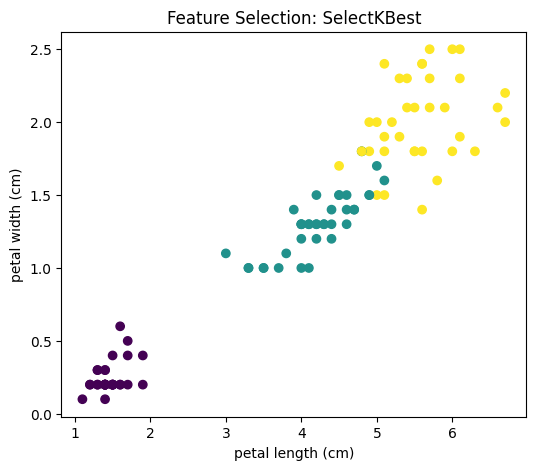

In [4]:
from sklearn.feature_selection import SelectKBest, f_classif


selector = SelectKBest(score_func=f_classif, k=2)
X_train_fs = selector.fit_transform(X_train, y_train)
X_test_fs = selector.transform(X_test)


selected_idx = selector.get_support(indices=True)
print("Selected Features (SelectKBest):", [feature_names[i] for i in selected_idx])


log_fs = LogisticRegression(max_iter=200)
log_fs.fit(X_train_fs, y_train)
print("Logistic Regression (SelectKBest):", accuracy_score(y_test, log_fs.predict(X_test_fs)))


plt.figure(figsize=(6,5))
plt.scatter(X_train_fs[:,0], X_train_fs[:,1], c=y_train, cmap='viridis')
plt.xlabel(feature_names[selected_idx[0]])
plt.ylabel(feature_names[selected_idx[1]])
plt.title("Feature Selection: SelectKBest")
plt.show()

In [5]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=2)
X_train_fs = selector.fit_transform(X_train, y_train)

# Scores for all features
print("F-scores:", selector.scores_)

# p-values for each feature
print("p-values:", selector.pvalues_)

# Mask of selected features
print("Mask:", selector.get_support())

# Indices of selected features
print("Selected indices:", selector.get_support(indices=True))

# Names of selected features
print("Selected Features:", [feature_names[i] for i in selector.get_support(indices=True)])

F-scores: [ 74.7572012   33.41979913 713.45534904 526.54162416]
p-values: [1.02306435e-20 6.87731544e-12 1.08422812e-60 1.75926474e-54]
Mask: [False False  True  True]
Selected indices: [2 3]
Selected Features: ['petal length (cm)', 'petal width (cm)']


Selected Features (RFE): ['petal length (cm)', 'petal width (cm)']
Logistic Regression (RFE): 1.0


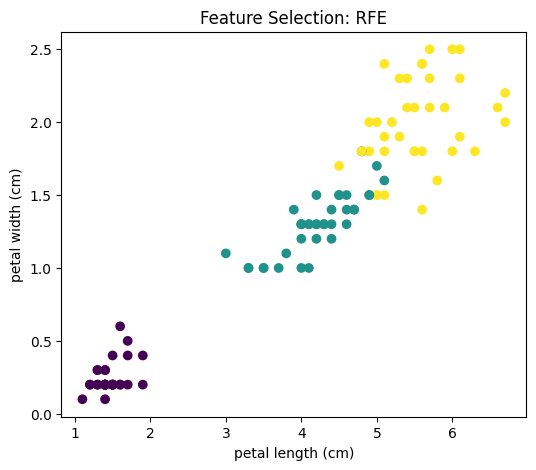

In [6]:
from sklearn.feature_selection import RFE


rfe = RFE(estimator=LogisticRegression(max_iter=200), n_features_to_select=2)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)


selected_idx_rfe = rfe.get_support(indices=True)
print("Selected Features (RFE):", [feature_names[i] for i in selected_idx_rfe])


log_rfe = LogisticRegression(max_iter=200)
log_rfe.fit(X_train_rfe, y_train)
print("Logistic Regression (RFE):", accuracy_score(y_test, log_rfe.predict(X_test_rfe)))


plt.figure(figsize=(6,5))
plt.scatter(X_train_rfe[:,0], X_train_rfe[:,1], c=y_train, cmap='viridis')
plt.xlabel(feature_names[selected_idx_rfe[0]])
plt.ylabel(feature_names[selected_idx_rfe[1]])
plt.title("Feature Selection: RFE")
plt.show()

Logistic Regression (PCA): 1.0


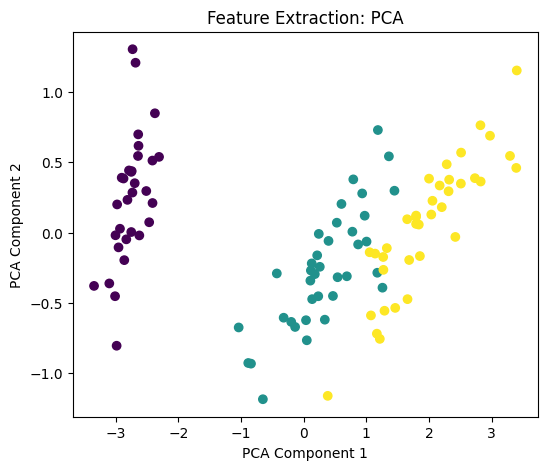

In [7]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


log_pca = LogisticRegression(max_iter=200)
log_pca.fit(X_train_pca, y_train)
print("Logistic Regression (PCA):", accuracy_score(y_test, log_pca.predict(X_test_pca)))


plt.figure(figsize=(6,5))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Feature Extraction: PCA")
plt.show()

Logistic Regression (LDA): 1.0


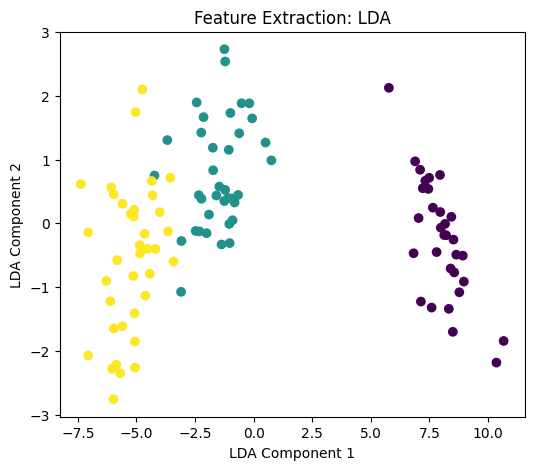

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


log_lda = LogisticRegression(max_iter=200)
log_lda.fit(X_train_lda, y_train)
print("Logistic Regression (LDA):", accuracy_score(y_test, log_lda.predict(X_test_lda)))


plt.figure(figsize=(6,5))
plt.scatter(X_train_lda[:,0], X_train_lda[:,1], c=y_train, cmap='viridis')
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("Feature Extraction: LDA")
plt.show()

In [9]:
print("\nSummary of Results:")
print("All features:", accuracy_score(y_test, log_full.predict(X_test)))
print("SelectKBest:", accuracy_score(y_test, log_fs.predict(X_test_fs)))
print("RFE:", accuracy_score(y_test, log_rfe.predict(X_test_rfe)))
print("PCA:", accuracy_score(y_test, log_pca.predict(X_test_pca)))
print("LDA:", accuracy_score(y_test, log_lda.predict(X_test_lda)))


Summary of Results:
All features: 1.0
SelectKBest: 1.0
RFE: 1.0
PCA: 1.0
LDA: 1.0


In [10]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
print("Dataset shape:", X.shape)  # (569, 30)


Dataset shape: (569, 30)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [14]:
log_full = LogisticRegression(max_iter=5000)
log_full.fit(X_train, y_train)
baseline_acc = accuracy_score(y_test, log_full.predict(X_test))
print("Logistic Regression (all 30 features):", baseline_acc)

Logistic Regression (all 30 features): 0.9766081871345029


In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)  # select top 5 features
X_train_fs = selector.fit_transform(X_train, y_train)
X_test_fs = selector.transform(X_test)

log_fs = LogisticRegression(max_iter=5000)
log_fs.fit(X_train_fs, y_train)
fs_acc = accuracy_score(y_test, log_fs.predict(X_test_fs))
print("Logistic Regression (SelectKBest, 5 features):", fs_acc)

Logistic Regression (SelectKBest, 5 features): 0.9590643274853801


In [16]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

log_rfe = LogisticRegression(max_iter=5000)
log_rfe.fit(X_train_rfe, y_train)
rfe_acc = accuracy_score(y_test, log_rfe.predict(X_test_rfe))
print("Logistic Regression (RFE, 5 features):", rfe_acc)

Logistic Regression (RFE, 5 features): 0.8654970760233918


In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)  # reduce to 5 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

log_pca = LogisticRegression(max_iter=5000)
log_pca.fit(X_train_pca, y_train)
pca_acc = accuracy_score(y_test, log_pca.predict(X_test_pca))
print("Logistic Regression (PCA, 5 components):", pca_acc)

Logistic Regression (PCA, 5 components): 0.9649122807017544


In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)  # binary classification → max 1 comp
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

log_lda = LogisticRegression(max_iter=5000)
log_lda.fit(X_train_lda, y_train)
lda_acc = accuracy_score(y_test, log_lda.predict(X_test_lda))
print("Logistic Regression (LDA, 1 component):", lda_acc)

Logistic Regression (LDA, 1 component): 0.9590643274853801


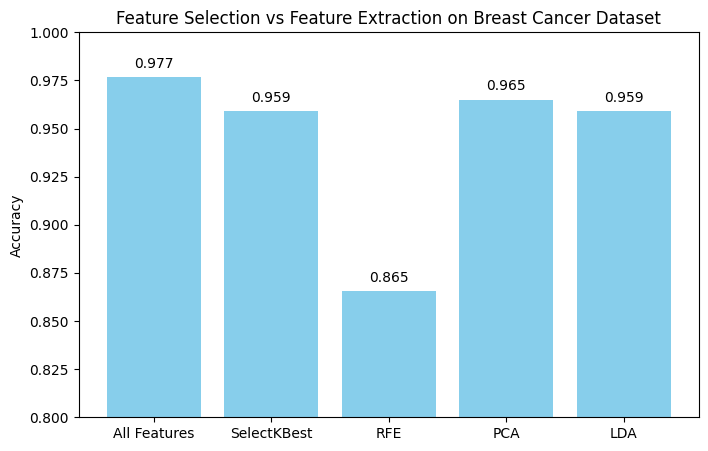

In [19]:
import numpy as np

methods = ["All Features", "SelectKBest", "RFE", "PCA", "LDA"]
accuracies = [baseline_acc, fs_acc, rfe_acc, pca_acc, lda_acc]

plt.figure(figsize=(8,5))
plt.bar(methods, accuracies, color="skyblue")
plt.ylim(0.8, 1.0)
plt.ylabel("Accuracy")
plt.title("Feature Selection vs Feature Extraction on Breast Cancer Dataset")
for i, acc in enumerate(accuracies):
    plt.text(i, acc+0.005, f"{acc:.3f}", ha='center')
plt.show()

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

#  Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert to torch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)
y_test_t = torch.tensor(y_test, dtype=torch.long)

#  Define a MLP
class SimpleMLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 2)  # binary classification
        )
    def forward(self, x):
        return self.model(x)

# Initialize model
model = SimpleMLP(X_train.shape[1])

#  Training setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
epochs = 10000

# Store loss for plotting
train_losses = []
test_losses = []

#  Training loop
for epoch in range(epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Evaluation on test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_t)
        test_loss = criterion(test_outputs, y_test_t)
        test_losses.append(test_loss.item())

    if (epoch+1) % 20 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")


#  Evaluate (final)
model.eval()
with torch.no_grad():
    preds = model(X_test_t)
    predicted_labels = torch.argmax(preds, axis=1)
    acc = accuracy_score(y_test_t, predicted_labels)
    print("MLP Test Accuracy:", acc)

Epoch 20/10000, Train Loss: 0.6559, Test Loss: 0.6510
Epoch 40/10000, Train Loss: 0.6424, Test Loss: 0.6365
Epoch 60/10000, Train Loss: 0.6282, Test Loss: 0.6212
Epoch 80/10000, Train Loss: 0.6128, Test Loss: 0.6048
Epoch 100/10000, Train Loss: 0.5959, Test Loss: 0.5867
Epoch 120/10000, Train Loss: 0.5777, Test Loss: 0.5673
Epoch 140/10000, Train Loss: 0.5583, Test Loss: 0.5464
Epoch 160/10000, Train Loss: 0.5370, Test Loss: 0.5240
Epoch 180/10000, Train Loss: 0.5142, Test Loss: 0.5001
Epoch 200/10000, Train Loss: 0.4902, Test Loss: 0.4752
Epoch 220/10000, Train Loss: 0.4653, Test Loss: 0.4498
Epoch 240/10000, Train Loss: 0.4405, Test Loss: 0.4248
Epoch 260/10000, Train Loss: 0.4163, Test Loss: 0.4007
Epoch 280/10000, Train Loss: 0.3929, Test Loss: 0.3777
Epoch 300/10000, Train Loss: 0.3705, Test Loss: 0.3559
Epoch 320/10000, Train Loss: 0.3492, Test Loss: 0.3352
Epoch 340/10000, Train Loss: 0.3290, Test Loss: 0.3157
Epoch 360/10000, Train Loss: 0.3101, Test Loss: 0.2973
Epoch 380/1000

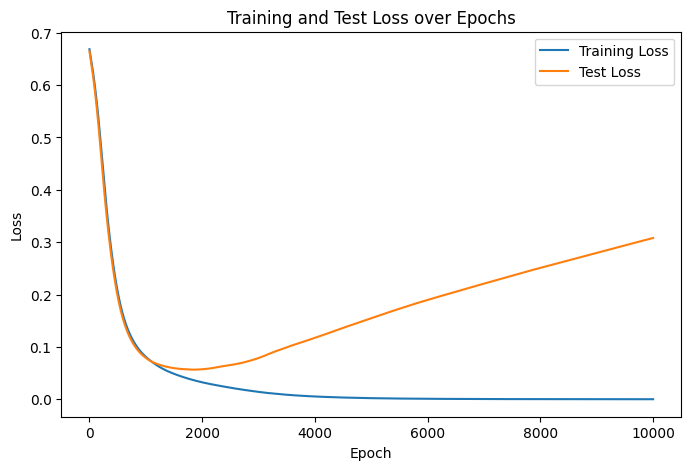

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), test_losses, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Test Loss over Epochs")
plt.legend()
plt.show()